In [78]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [79]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [80]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [81]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# 문자열(object) 타입 열만 선택해서 인코딩
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

/tmp/ipython-input-1423581606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-1423581606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-1423581606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [83]:
y = df['Rainfall']
y.head()

,Rainfall
0,0.0
1,3.6
2,3.6
3,39.8
4,2.8


In [84]:
X = df.drop(['Rainfall', 'Location'], axis=1)
X.head()

,Date,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,70,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,81,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,83,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,84,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(262, 22) (262,)
(66, 22) (66,)


In [86]:
#선형회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
y_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, y_preds))  #평가


22.798955702735782


In [89]:
#MSE (Random Forest, 여러 결정트리를 앙상블해서 평균)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 22.669343212121195


In [91]:
#MSE (Decision Tree, 하나의 결정트리로 예측)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 24.96060606060605


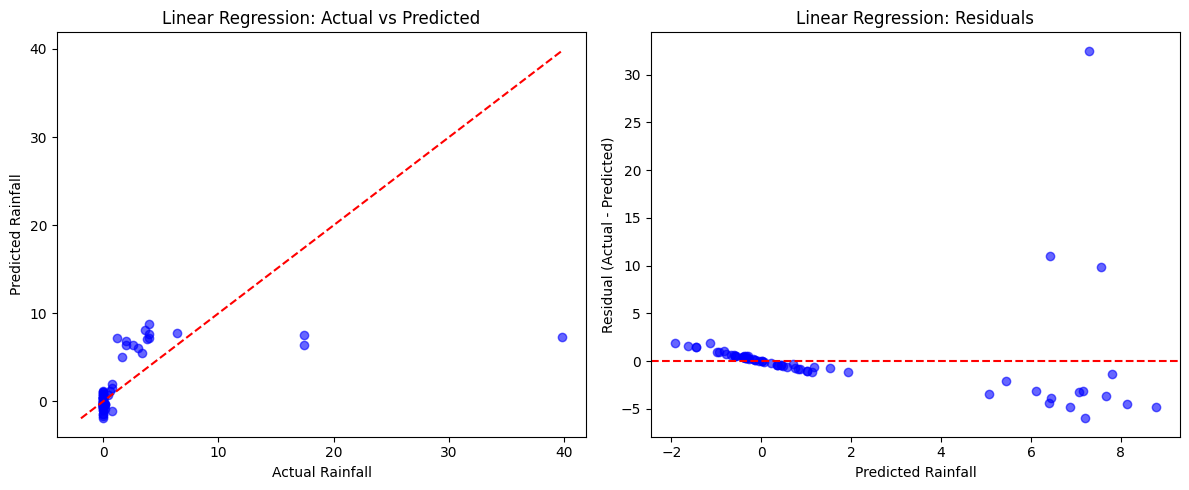

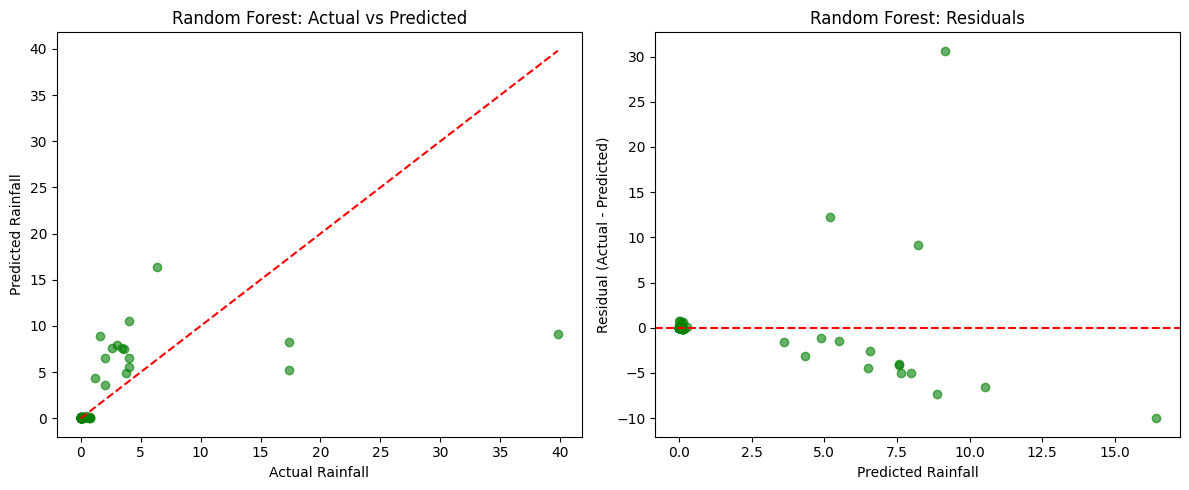

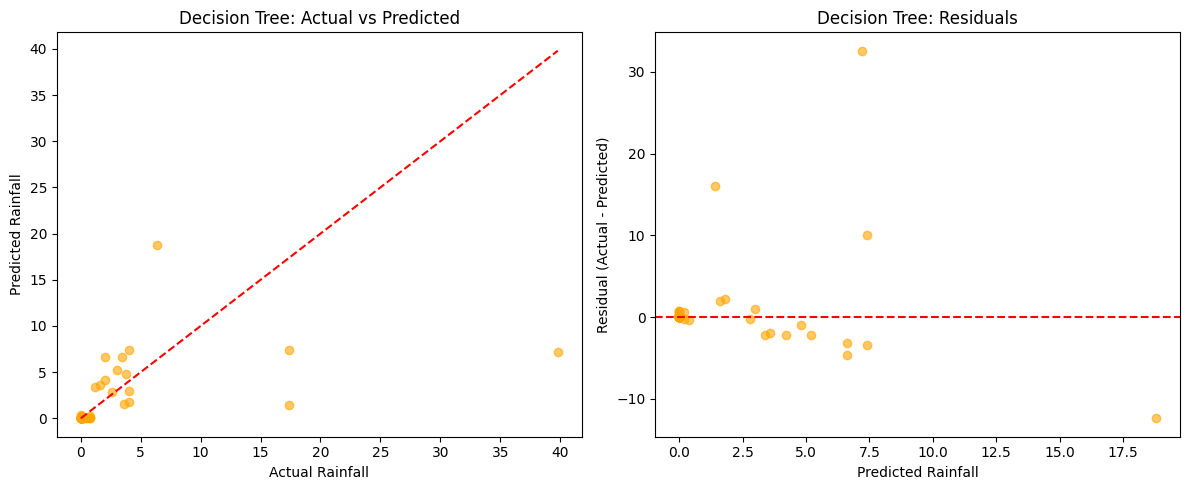

In [93]:
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Linear Regression
plt.figure(figsize=(12,5))

# Actual vs Predicted
plt.subplot(1,2,1)
plt.scatter(y_test, y_preds, alpha=0.6, color="blue")
lims = [min(y_test.min(), y_preds.min()), max(y_test.max(), y_preds.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Linear Regression: Actual vs Predicted")

# Residuals
plt.subplot(1,2,2)
plt.scatter(y_preds, y_test - y_preds, alpha=0.6, color="blue")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rainfall")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Linear Regression: Residuals")

plt.tight_layout()
plt.show()


# ------------------------------------------------------
# Random Forest
plt.figure(figsize=(12,5))

# Actual vs Predicted
plt.subplot(1,2,1)
plt.scatter(y_test, ry_preds, alpha=0.6, color="green")
lims = [min(y_test.min(), ry_preds.min()), max(y_test.max(), ry_preds.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Random Forest: Actual vs Predicted")

# Residuals
plt.subplot(1,2,2)
plt.scatter(ry_preds, y_test - ry_preds, alpha=0.6, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rainfall")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Random Forest: Residuals")

plt.tight_layout()
plt.show()


# ------------------------------------------------------
# Decision Tree
plt.figure(figsize=(12,5))

# Actual vs Predicted
plt.subplot(1,2,1)
plt.scatter(y_test, dy_preds, alpha=0.6, color="orange")
lims = [min(y_test.min(), dy_preds.min()), max(y_test.max(), dy_preds.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Decision Tree: Actual vs Predicted")

# Residuals
plt.subplot(1,2,2)
plt.scatter(dy_preds, y_test - dy_preds, alpha=0.6, color="orange")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rainfall")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Decision Tree: Residuals")

plt.tight_layout()
plt.show()